In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
spotify_df = pd.read_csv('temp/spotify-2023(new).csv')

## Inspecting the data

In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Removal of unnecessary columns
* To easily retrieve the name of columns and feed them into the drop function , use .column attribute
* It is important to mention axis = 1 which refers to columns as the default axis which is 0 refer to rows
* So for better data cleaning and increasing it's usability in further computations we use these parameters.

In [5]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [6]:
spotify_df.drop(['bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis = 1, inplace = True)

## Scouting the resultant DataFrame

In [7]:
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0


## Examining Datatypes
* 'streams' column have object datatype in the original dataframe which is unsuitable for any calculations involving this column.
* Try to change it to int datatype and it shows that values of this column are too big to conform to this datatype
* resorting to float datatype seems logical but another error arises as it has some non-numeric values in it
* so to resolve that error we first make use of to_numeric function with parameter errors = 'coerce' and then finally convert it to float

In [8]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors = 'coerce')
spotify_df['streams'] = spotify_df['streams'].astype(float)

* combining these 3 columns : 'released_year','released_month', 'released_day' into a singular column : 'combined_date' with the appropriate datetime datatype
* leaving those 3 columns as it is and not dropping them as we might need individual attributes and splitting the combined column will require unnecessary work
  

In [9]:
spotify_df['combined_date'] = spotify_df.apply(lambda x: pd.to_datetime(f"{x['released_year']}-{x['released_month']}-{x['released_day']}", format='%Y-%m-%d'), axis=1)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   released_month        953 non-null    int64         
 5   released_day          953 non-null    int64         
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               952 non-null    float64       
 9   in_apple_playlists    953 non-null    int64         
 10  in_apple_charts       953 non-null    int64         
 11  in_deezer_playlists   953 non-null    object        
 12  in_deezer_charts      953 non-null    int64         
 13  in_shazam_charts    

## Analyzing the data

### Firstly, as a test we find out the top 10 streamed songs of year 2023
* As there are no complications now we move onto our next query

In [10]:
spotify_df2023 = spotify_df.loc[spotify_df['released_year'] == 2023]

In [11]:
pd.options.mode.chained_assignment = None

In [12]:
spotify_df2023.sort_values(by='streams', ascending=False, inplace=True)
top_10_songs_2023 = spotify_df2023.head(10).reset_index().copy()
top_10_songs_2023[['track_name','artist(s)_name', 'streams', 'released_year' ]]

,track_name,artist(s)_name,streams,released_year
0,Flowers,Miley Cyrus,1.316856e+09,2023
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",7.259801e+08,2023
2,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",7.219756e+08,2023
3,TQG,"Karol G, Shakira",6.189904e+08,2023
4,La Bebe - Remix,"Peso Pluma, Yng Lvcas",5.536341e+08,2023
5,Die For You - Remix,"Ariana Grande, The Weeknd",5.187451e+08,2023
6,un x100to,"Bad Bunny, Grupo Frontera",5.056714e+08,2023
7,Cupid - Twin Ver.,Fifty Fifty,4.967957e+08,2023
8,PRC,"Natanael Cano, Peso Pluma",4.360279e+08,2023
9,OMG,NewJeans,4.309775e+08,2023



### Top 10 most streamed songs of all time

In [13]:
spotify_df.sort_values(by=['streams', 'released_year'], ascending=[False, True], inplace=True)
top_10_songs_overall = spotify_df.head(10).reset_index()
top_10_songs_overall[['track_name','artist(s)_name', 'streams', 'released_year' ]]

,track_name,artist(s)_name,streams,released_year
0,Blinding Lights,The Weeknd,3.703895e+09,2019
1,Shape of You,Ed Sheeran,3.562544e+09,2017
2,Someone You Loved,Lewis Capaldi,2.887242e+09,2018
3,Dance Monkey,Tones and I,2.864792e+09,2019
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09,2018
5,One Dance,"Drake, WizKid, Kyla",2.713922e+09,2016
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09,2021
7,Believer,Imagine Dragons,2.594040e+09,2017
8,Closer,"The Chainsmokers, Halsey",2.591224e+09,2016
9,Starboy,"The Weeknd, Daft Punk",2.565530e+09,2016


In [14]:
spotify_top_songs = spotify_df.reset_index()
spotify_top_songs = spotify_top_songs[['track_name','artist(s)_name', 'streams', 'released_year' ]]

## Correlation between the number of artists contributing to a song and its popularity (measured by streams)

In [15]:
correlation = spotify_df['artist_count'].corr(spotify_df['streams'])

print("Correlation coefficient between number of artists and streams:", correlation)

Correlation coefficient between number of artists and streams: -0.13646347478241755


A correlation coefficient of -0.136 indicates a weak negative correlation between the number of artists contributing to a song and its popularity (measured by streams).

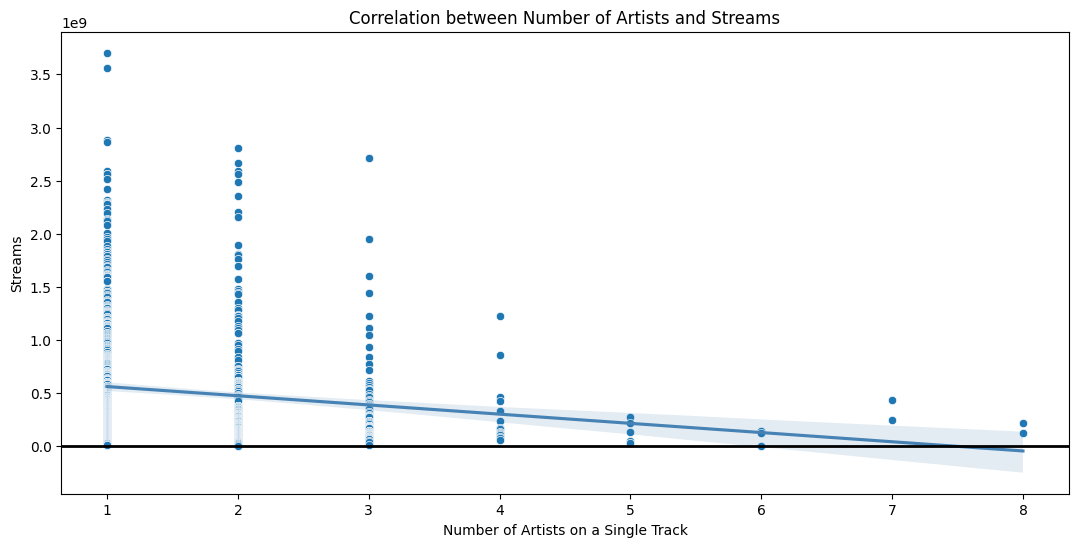

In [16]:
plt.figure(figsize=(13, 6))
sns.scatterplot(data=spotify_df, x='artist_count', y='streams')
sns.regplot(data=spotify_df, x='artist_count', y='streams', scatter=False, color = 'steelblue')
plt.title('Correlation between Number of Artists and Streams')
plt.xlabel('Number of Artists on a Single Track')
plt.ylabel('Streams')
plt.grid(False)
plt.axhline(0, color='black', linewidth=2)
plt.show()

## Distribution of streams across the last 23 years

* this graph is evidence of everincreasing demand and consumption of music
* this will lead to the expansion of music space allowing many more artists to come to the scene and we will see the increase in number of tracks being released per year.
* because supply matches the demand, that is, increased demand will lead to incresed supply.

In [17]:
streams_by_year = spotify_df.groupby('released_year')['streams'].sum().reset_index()

In [18]:
streams_by_years = streams_by_year.loc[streams_by_year['released_year'].isin(range(1990, 2023))]

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


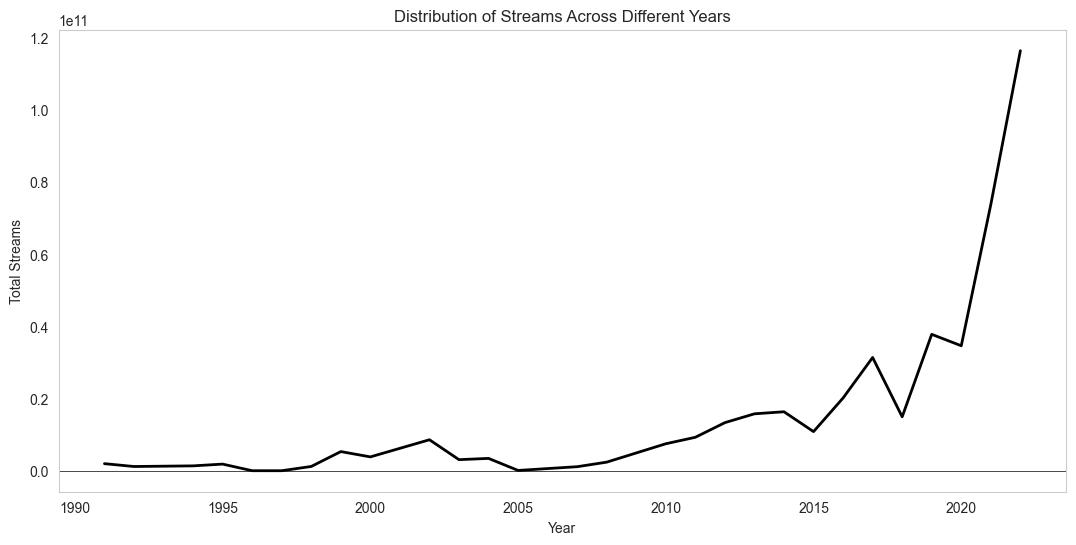

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(13, 6))
sns.lineplot(data=streams_by_years, x='released_year', y='streams', color='black', linewidth=2)
plt.title('Distribution of Streams Across Different Years')
plt.xlabel('Year')
plt.ylabel('Total Streams')
plt.grid(False)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

## Number of tracks released per month per year
* A consistent increase in the number of songs released per month with a notable peak in December, highlights the dynamics of the music industry throughout the year.
* Year 2022 is very different from others and we see a significant increase in the number of songs being released.
* From this we can deduce that music industry was boomin in 2022 and many new artists came on to the scene to match the evergrowing demands of users.
* This boom can also be attributed to the popularity of short form of content and the consumer market being larger than ever.

In [20]:
spotify_df =  spotify_df[spotify_df['released_year'] != 2023]
no_of_tracks_released = spotify_df.groupby(['released_year', 'released_month'])['track_name'].count().groupby(level=0).cumsum().reset_index()
no_of_tracks_released = no_of_tracks_released.tail(46)
no_of_tracks_released = pd.DataFrame(no_of_tracks_released)
no_of_tracks_released = no_of_tracks_released.rename(columns= {'track_name' : 'track_count'})

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packa

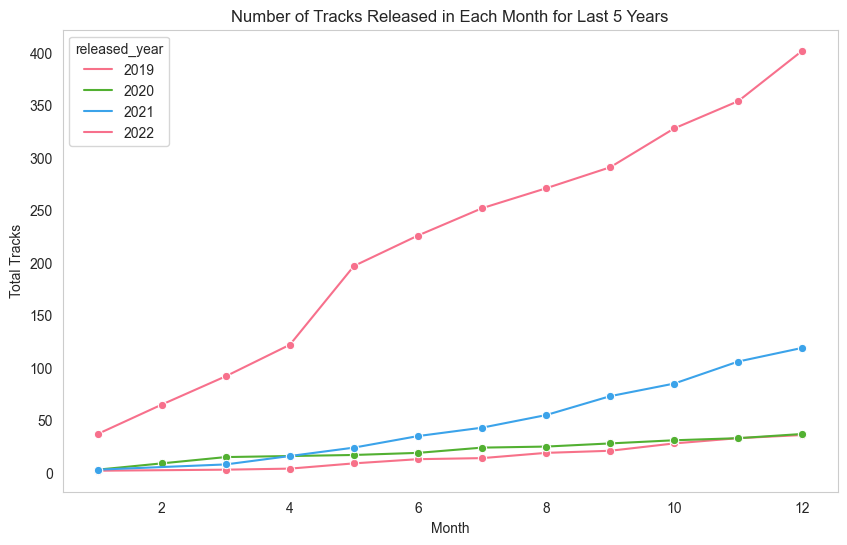

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=no_of_tracks_released, x='released_month', y='track_count', hue='released_year', marker='o', palette = "husl")

# Customize the plot
plt.title('Number of Tracks Released in Each Month for Last 5 Years')
plt.xlabel('Month')
plt.ylabel('Total Tracks')
plt.grid(False)

plt.show()

## Artists with the highest average number of streams per song

In [22]:
spotify_df['num_artists'] = spotify_df['artist(s)_name'].apply(lambda x: len(x.split(',')))
spotify_df['total_streams'] = spotify_df['streams'] / spotify_df['num_artists']
average_streams_per_artist = spotify_df.groupby('artist(s)_name')['total_streams'].mean().reset_index()
average_streams_per_artist.columns = ['artist(s)_name', 'avg_streams']
top_artists = average_streams_per_artist.sort_values(by = 'avg_streams', ascending = False)
top_artists[['artist(s)_name', 'avg_streams']].head(10)

,artist(s)_name,avg_streams
483,Tones and I,2.864792e+09
180,Glass Animals,2.557976e+09
386,Queen,2.197011e+09
193,Hozier,2.135158e+09
380,Post Malone,2.132336e+09
218,John Legend,2.086124e+09
501,Vance Joy,2.009095e+09
140,Ed Sheeran,1.953354e+09
482,Tom Odell,1.813674e+09
459,The Killers,1.806618e+09


## Patterns in the release dates of songs that become popular
* The first step to resolve this query was to group Top 100 Songs of all time(by Streams)
* Following that I found out the distibution of release date of these songs across Months.
* It was found that almost 25% of all the hit songs we took into account were released in January.
* And the least amount of hit songs were released in Feburary and April.

In [23]:
top_100_songs_overall = spotify_df.head(100).reset_index()
top_100_songs_overall[['track_name','artist(s)_name', 'streams', 'released_year' ]]

,track_name,artist(s)_name,streams,released_year
0,Blinding Lights,The Weeknd,3.703895e+09,2019
1,Shape of You,Ed Sheeran,3.562544e+09,2017
2,Someone You Loved,Lewis Capaldi,2.887242e+09,2018
3,Dance Monkey,Tones and I,2.864792e+09,2019
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09,2018
...,...,...,...,...
95,Heather,Conan Gray,1.301800e+09,2020
96,I Wanna Be Yours,Arctic Monkeys,1.297026e+09,2013
97,Iris,The Goo Goo Dolls,1.284943e+09,1998
98,Danza Kuduro,"Don Omar, Lucenzo",1.279435e+09,2010


In [24]:
monthly_avg_popularity = top_100_songs_overall.groupby('released_month')['track_name'].count().reset_index()


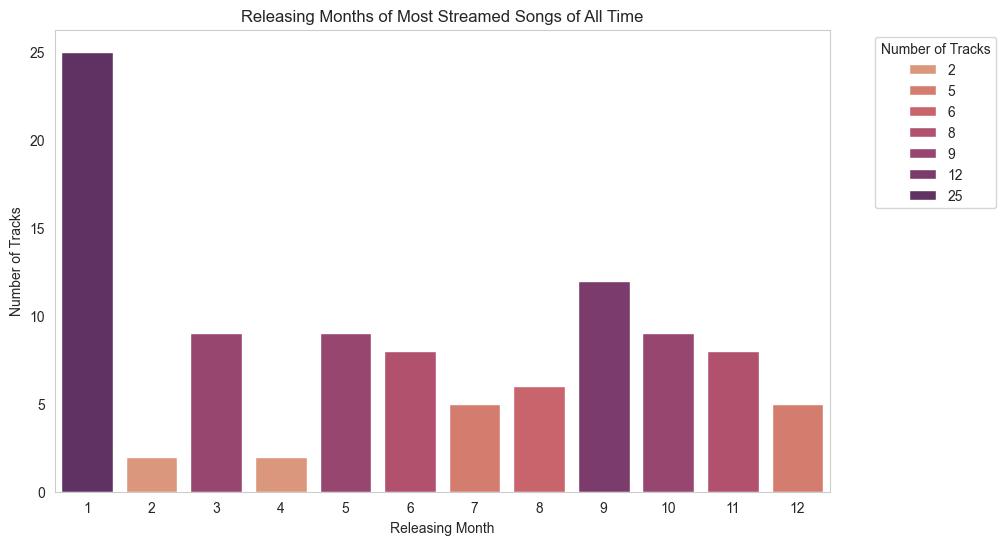

In [25]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_popularity, x='released_month', y='track_name',hue = 'track_name', dodge = False, palette="flare")

# Set the title and labels
plt.title('Releasing Months of Most Streamed Songs of All Time')
plt.xlabel('Releasing Month')
plt.ylabel('Number of Tracks')

# Remove the grid lines from the plot
plt.grid(False)
plt.legend(title='Number of Tracks', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

# Comparison 
* To find out the actual relation between the popularity of songs and their respective Release months I take into account the total number of Songs Released each month.

In [26]:
all_songs = spotify_df.groupby('released_month')['track_name'].count().reset_index()


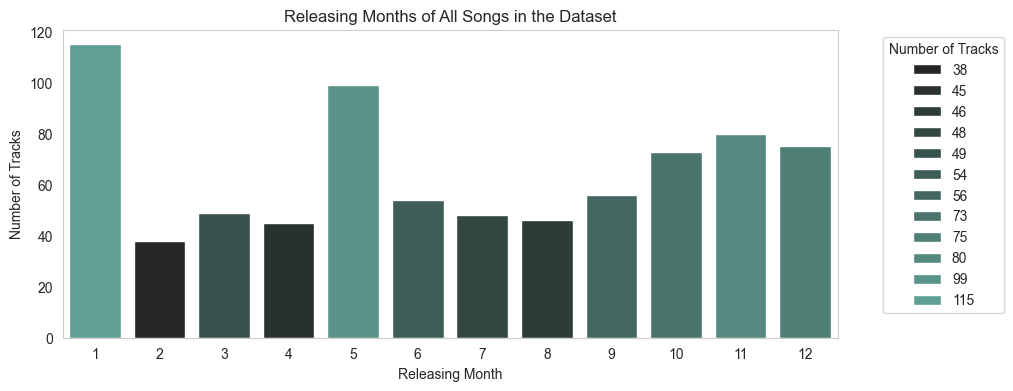

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.barplot(data=all_songs, x='released_month', y='track_name',hue ='track_name', dodge = False,  palette = "dark:#5A9")
plt.xlabel('Releasing Month')
plt.ylabel('Number of Tracks')
plt.title('Releasing Months of All Songs in the Dataset')
plt.grid(False)
plt.legend(title='Number of Tracks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## The relative success or popularity of songs with their Released Months
* January and September has the highest success rate, that is, out of all the songs released in these months around 21% of them saw immense popularity
* April has the lowest success rate, that is, a mere 4.5%

In [28]:
merged_df = pd.merge(monthly_avg_popularity, all_songs, on='released_month', suffixes=('_streamed', '_normal'))


merged_df['streamed_to_released_ratio'] = merged_df['track_name_streamed'] / merged_df['track_name_normal']

merged_df[['streamed_to_released_percentage']] = merged_df[['streamed_to_released_ratio']]*100
merged_df = merged_df.sort_values('streamed_to_released_percentage', ascending = False).round(2)
merged_df = merged_df[['streamed_to_released_percentage','released_month' ]]

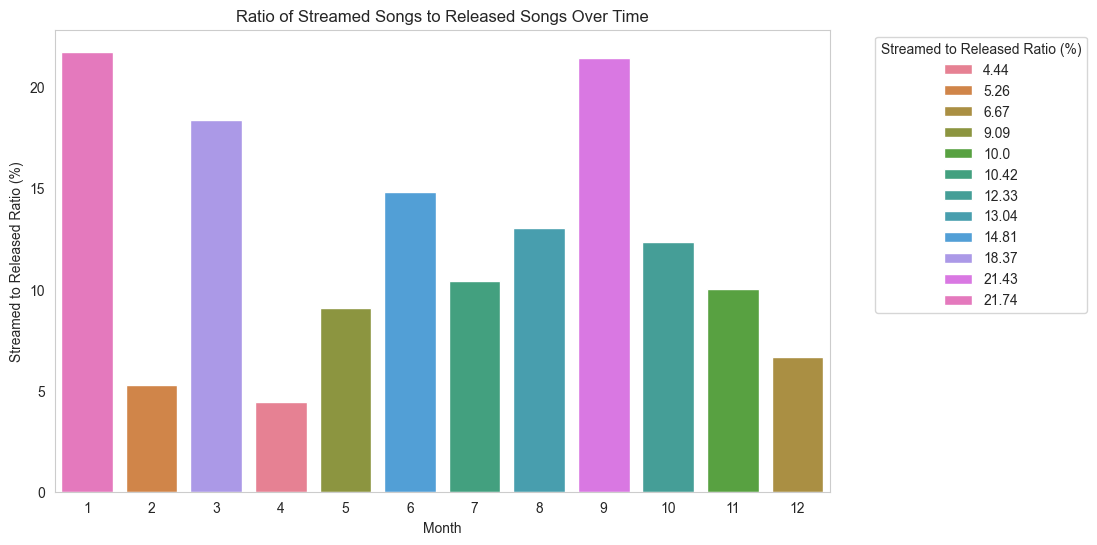

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='released_month', y='streamed_to_released_percentage', hue='streamed_to_released_percentage', dodge=False, palette = "husl")
plt.title('Ratio of Streamed Songs to Released Songs Over Time')
plt.xlabel('Month')
plt.ylabel('Streamed to Released Ratio (%)')
plt.grid(False)
plt.legend(title='Streamed to Released Ratio (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()